In [1]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
mpl.rcParams['font.size'] = 4

In [12]:
df2 = pd.read_csv('cleaned_data.csv')

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [7]:
lr_model = LogisticRegression(C = 1.0, 
                              class_weight = None, 
                              dual = False, 
                              fit_intercept = True,
                             intercept_scaling = 1,
                             max_iter = 100,
                             multi_class = 'auto',
                             n_jobs = None,
                             penalty = 'l2',
                             random_state = None,
                             solver = 'warn',
                             tol = 0.0001,
                             verbose = 0,
                             warm_start = False)

In [8]:
lr_model

LogisticRegression(solver='warn')

In [9]:
lr_model.C = 0.1
lr_model.solver = 'liblinear'
lr_model

LogisticRegression(C=0.1, solver='liblinear')

In [13]:
X = df2['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]], dtype=int64)

In [14]:
y = df2['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [15]:
lr_model.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [17]:
new_X = df2['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]], dtype=int64)

In [18]:
lr_model.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
df2['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [21]:
np.random.seed(seed = 1)

X = np.random.uniform(low = 0.0, high = 10.0, size = (1000,))
X[0:10]

array([4.17022005e+00, 7.20324493e+00, 1.14374817e-03, 3.02332573e+00,
       1.46755891e+00, 9.23385948e-01, 1.86260211e+00, 3.45560727e+00,
       3.96767474e+00, 5.38816734e+00])

In [22]:
np.random.seed(seed = 1)

slope = 0.25
intercept = -1.25

y = slope * X + np.random.normal(loc = 0.0, scale = 1, size = (1000,)) + intercept

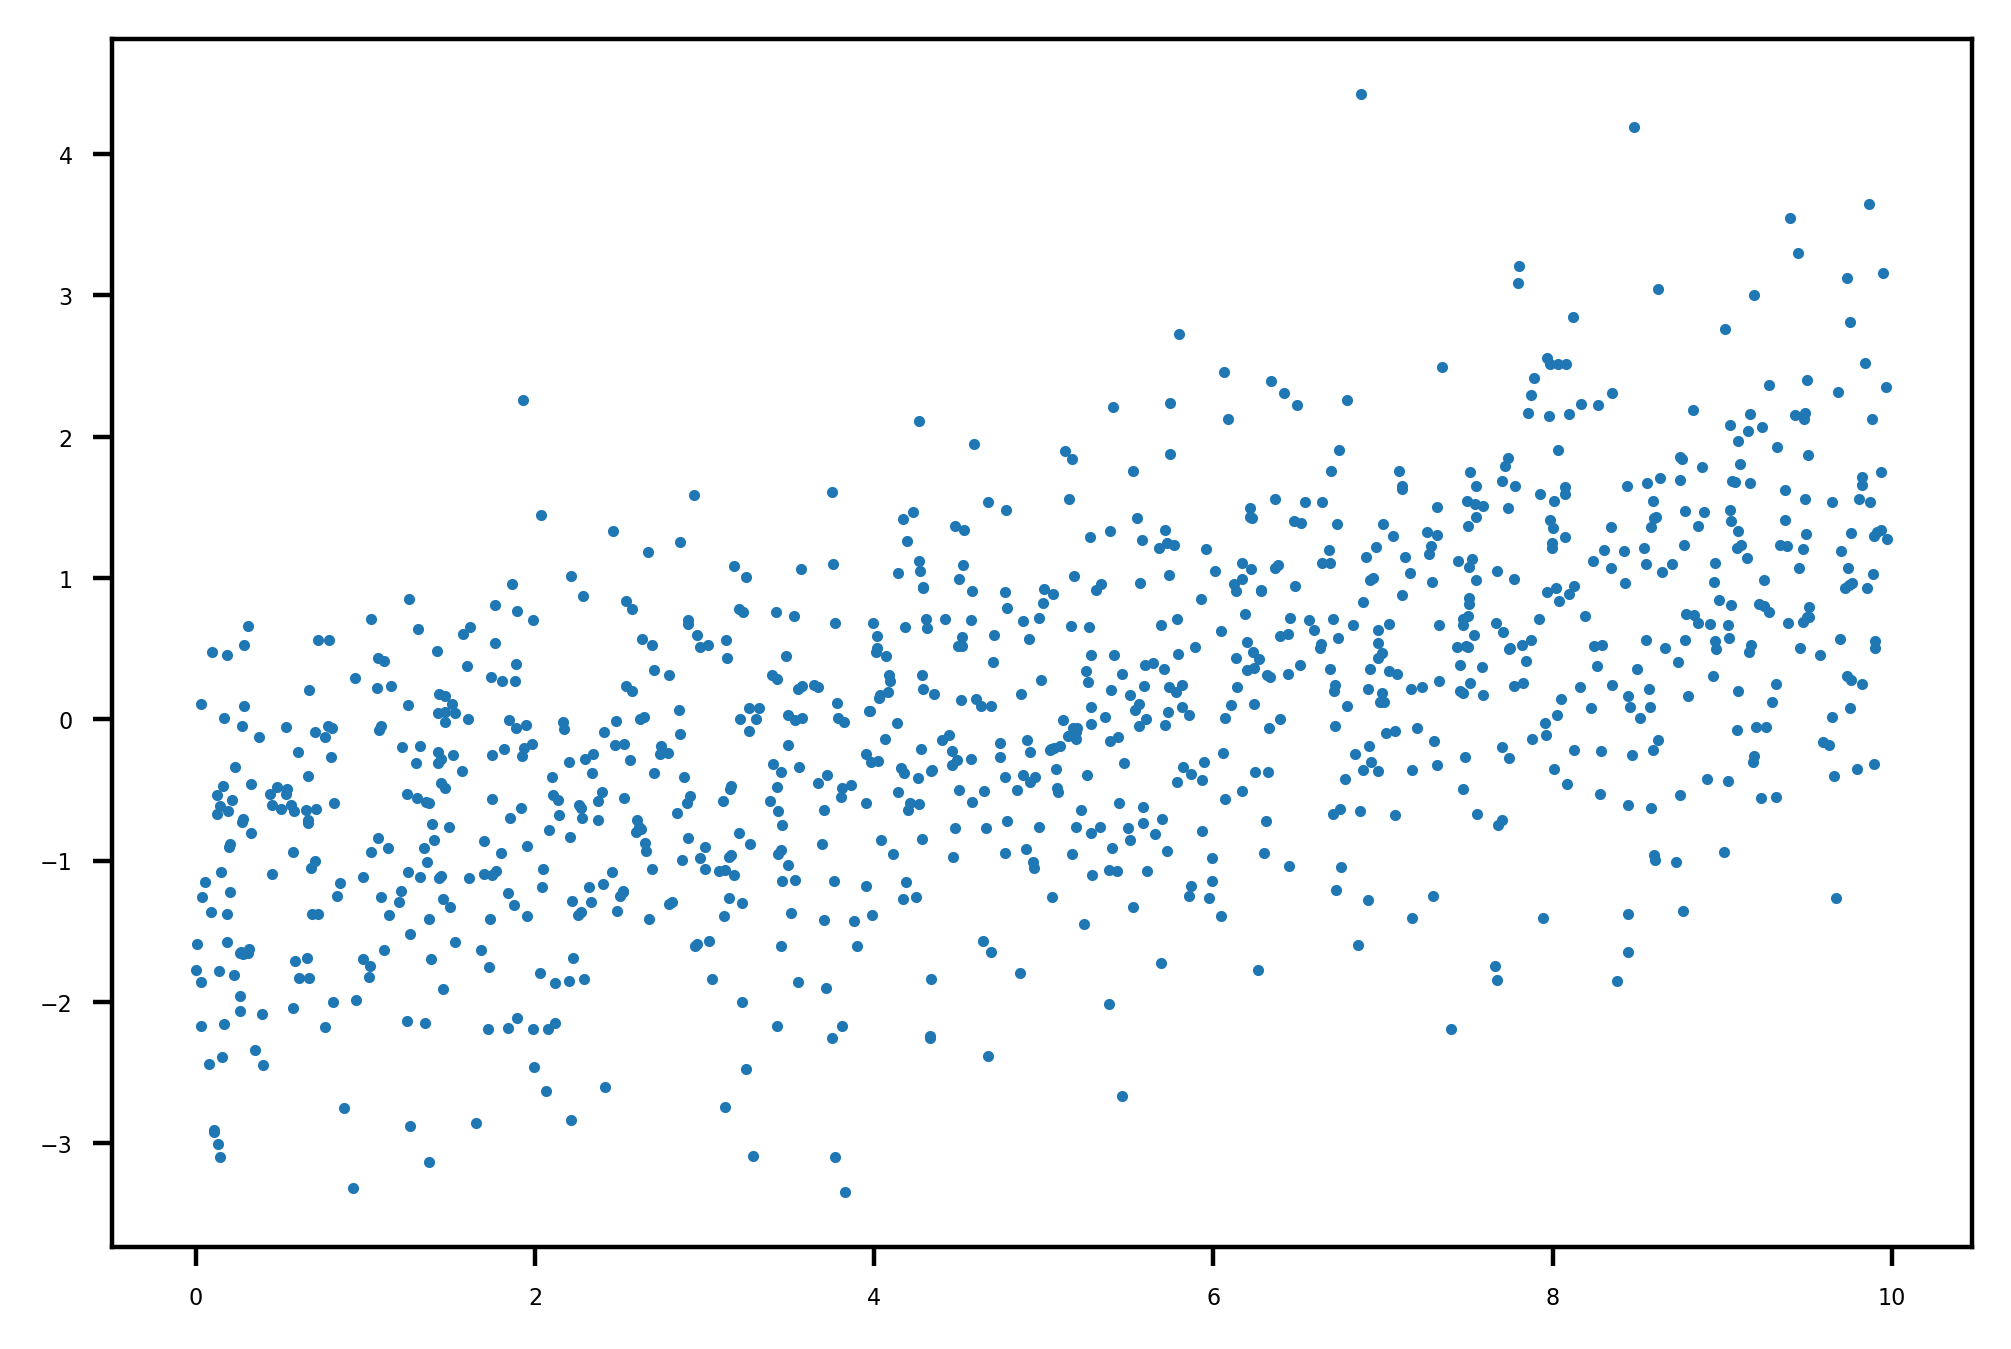

In [23]:
plt.scatter(X, y, s = 1)
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [25]:
lin_reg.fit(X.reshape(-1,1), y)
print(f"Intercept:{lin_reg.intercept_}, Coefficient:{lin_reg.coef_}")

Intercept:-1.161256600282589, Coefficient:[0.24002588]


In [26]:
y_pred = lin_reg.predict(X.reshape(-1,1))

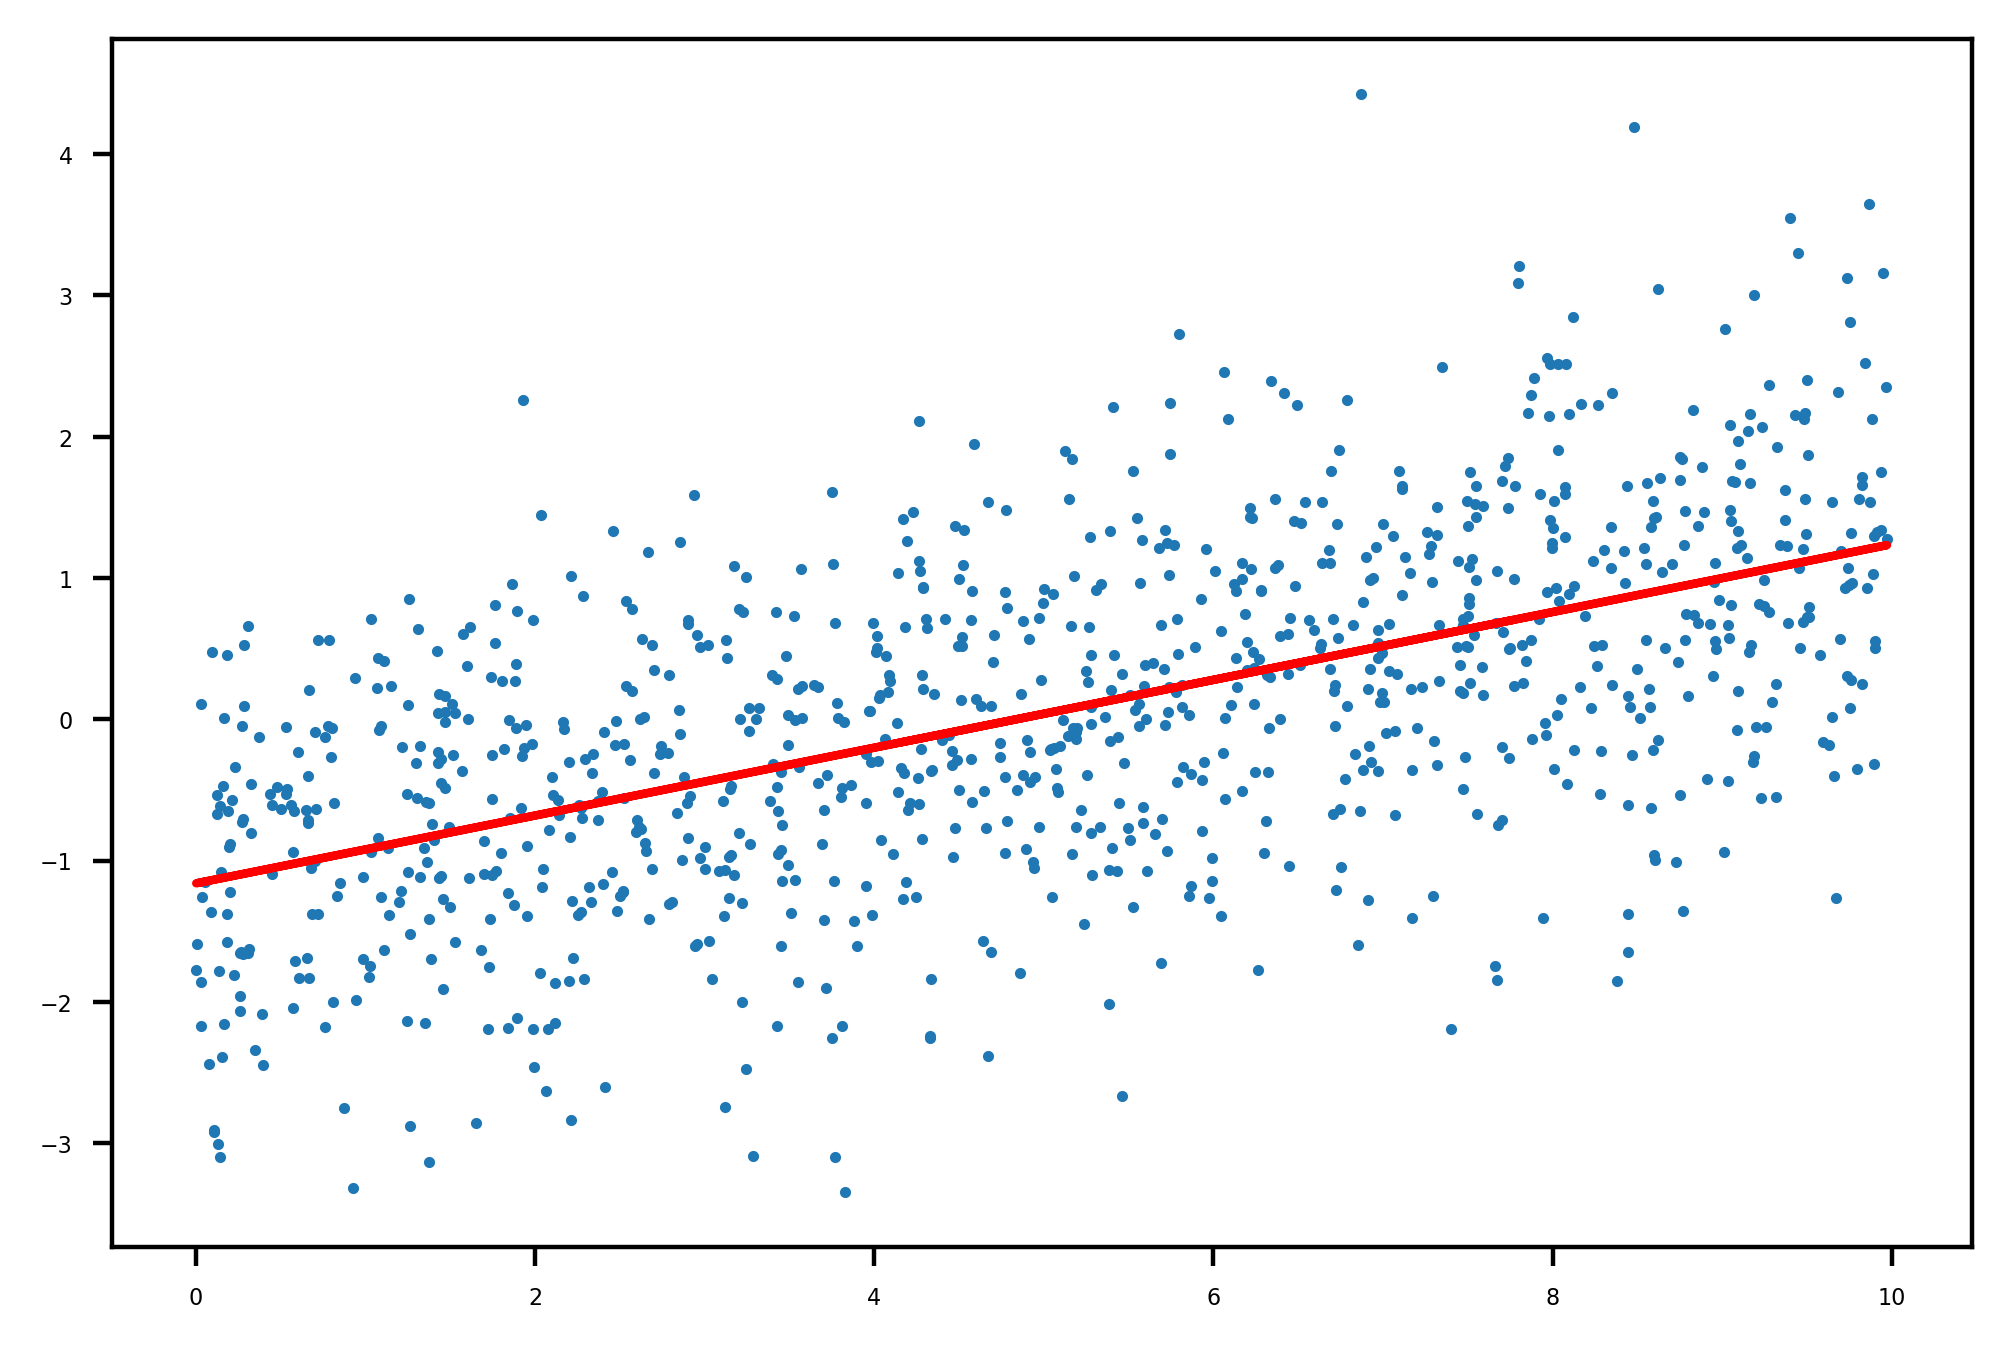

In [27]:
plt.scatter(X, y, s = 1)
plt.plot(X, y_pred, 'r')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2['LIMIT_BAL'].values.reshape(-1,1),
                                                    df2['default payment next month'].values, 
                                                    test_size = 0.2, random_state = 24)

In [30]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(21331, 1) (21331,) (5333, 1) (5333,)


In [31]:
print(np.mean(y_train), np.mean(y_test))

0.223102526838873 0.21657603600225014


In [32]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                                intercept_scaling=1, max_iter=100, multi_class='auto', n_jobs=None,
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
                                verbose=0, warm_start=False)

In [33]:
example_lr.fit(X_train, y_train)
y_pred = example_lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7834239639977498

In [35]:
print(example_lr.score(X_test, y_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.7834239639977498
0.7834239639977498


In [36]:
P = sum(y_test)
P

1155

In [37]:
TP = sum( (y_test==1) & (y_pred==1) ) # Calculating True Positives
print(TP)

TPR = TP/P # Calculating True Positive Rate
print(TPR)

0
0.0


In [38]:
FN = sum((y_test == 1) & (y_pred == 0))
print(FN)

FNR = FN/P
print(FNR)

1155
1.0


In [39]:
N = sum(y_test==0)
TN = sum((y_test==0) & (y_pred==0))
FP = sum((y_test==0) & (y_pred==1))
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [40]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[4178    0]
 [1155    0]]


In [41]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

In [42]:
prob_sum = np.sum(y_pred_proba, 1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [43]:
prob_sum.shape

(5333,)

In [44]:
np.unique(prob_sum)

array([1.])

In [45]:
pos_proba = y_pred_proba[:, 1]
pos_proba

array([0.25173076, 0.415703  , 0.20395547, ..., 0.415703  , 0.17278502,
       0.33606566])

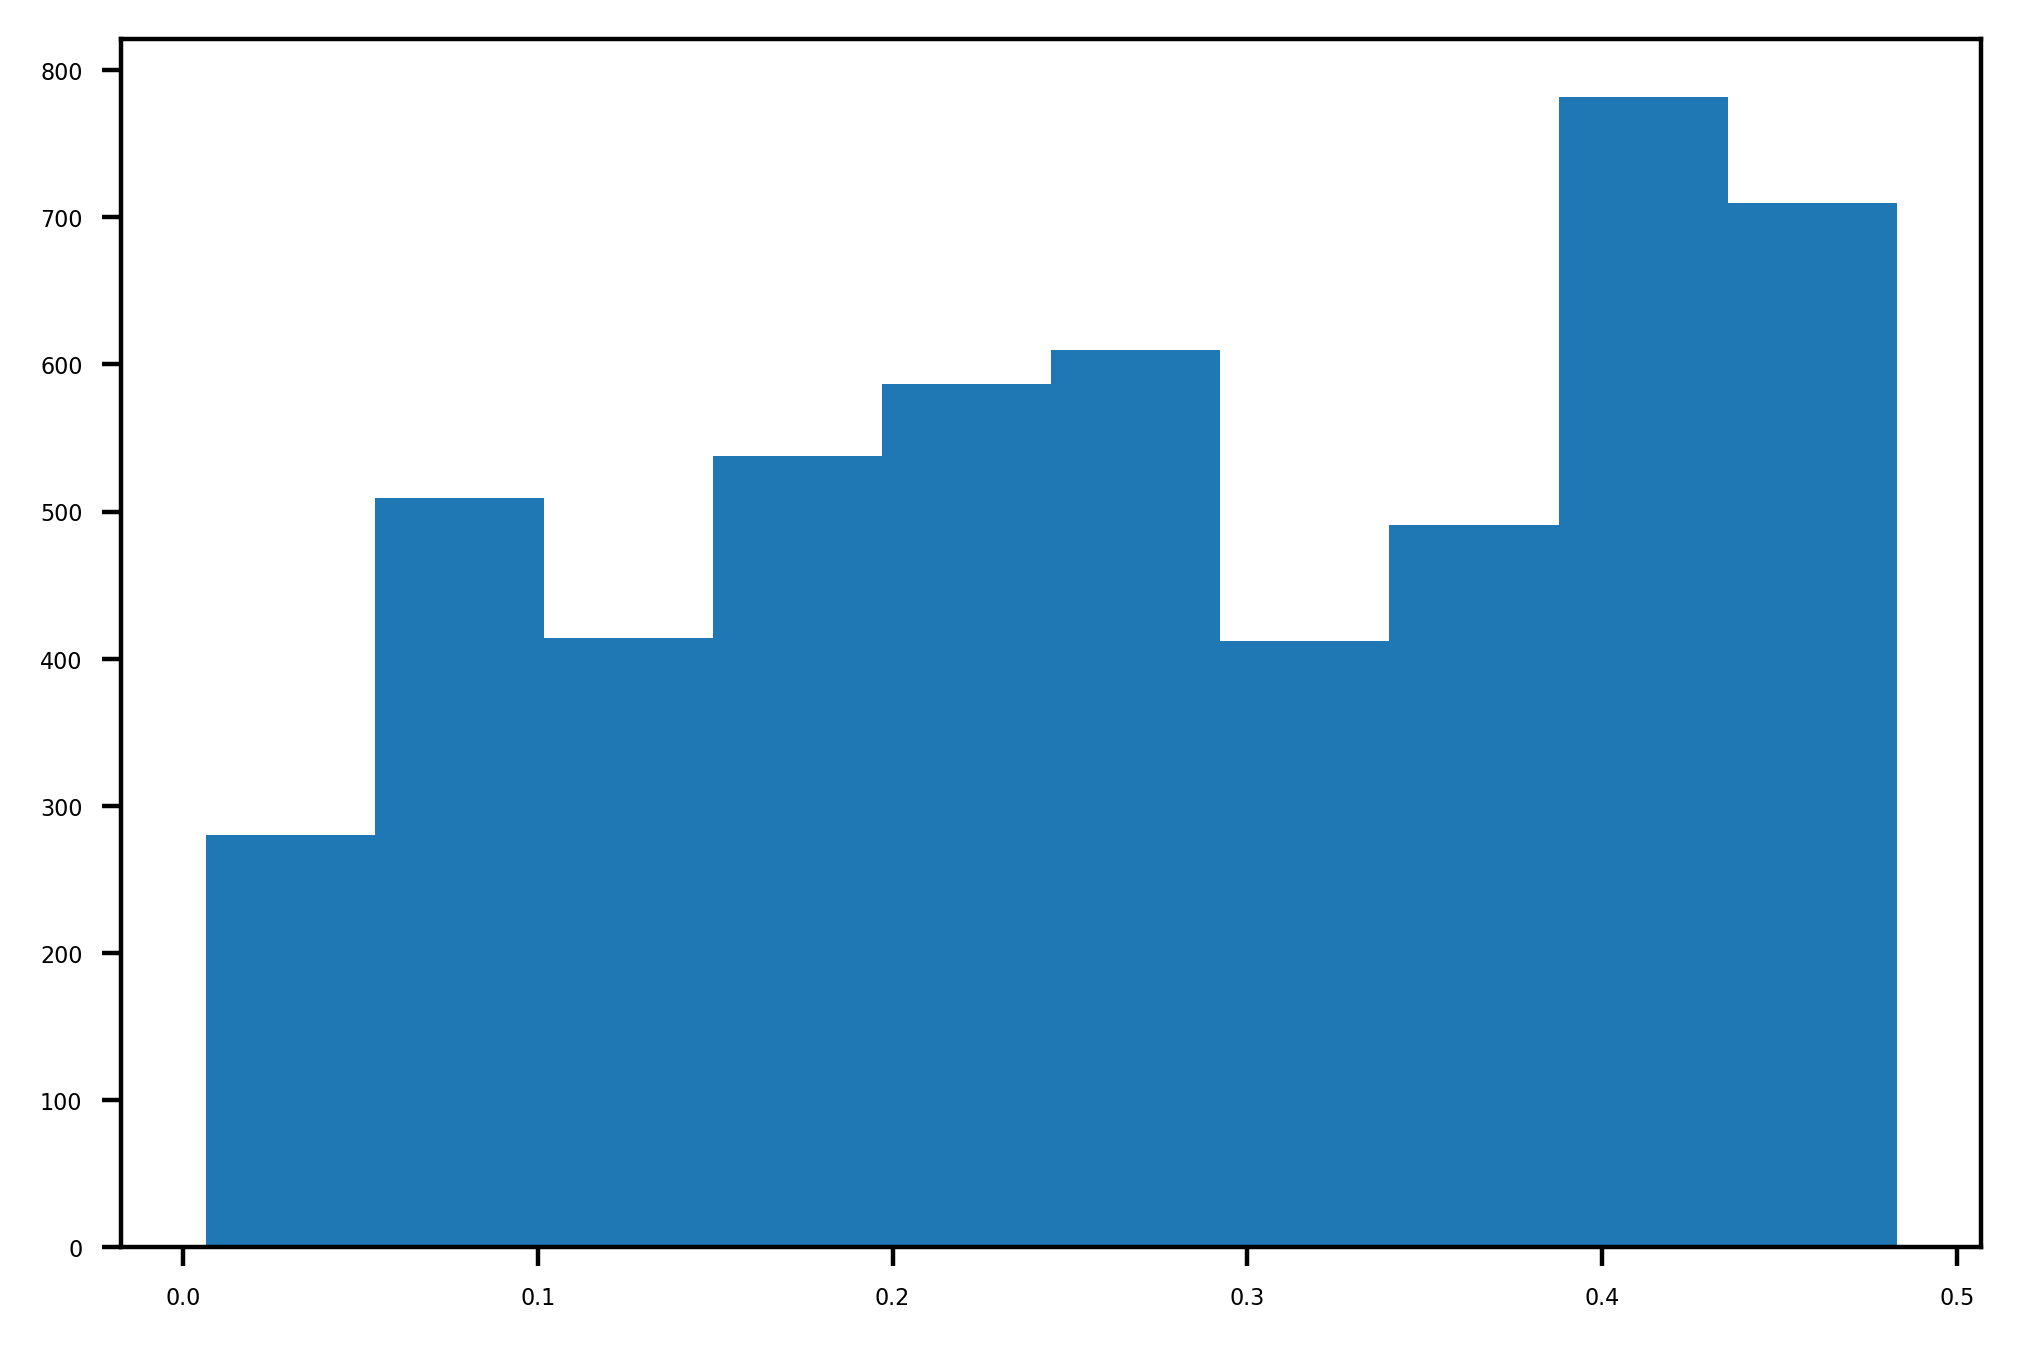

In [46]:
plt.hist(pos_proba)
plt.show()

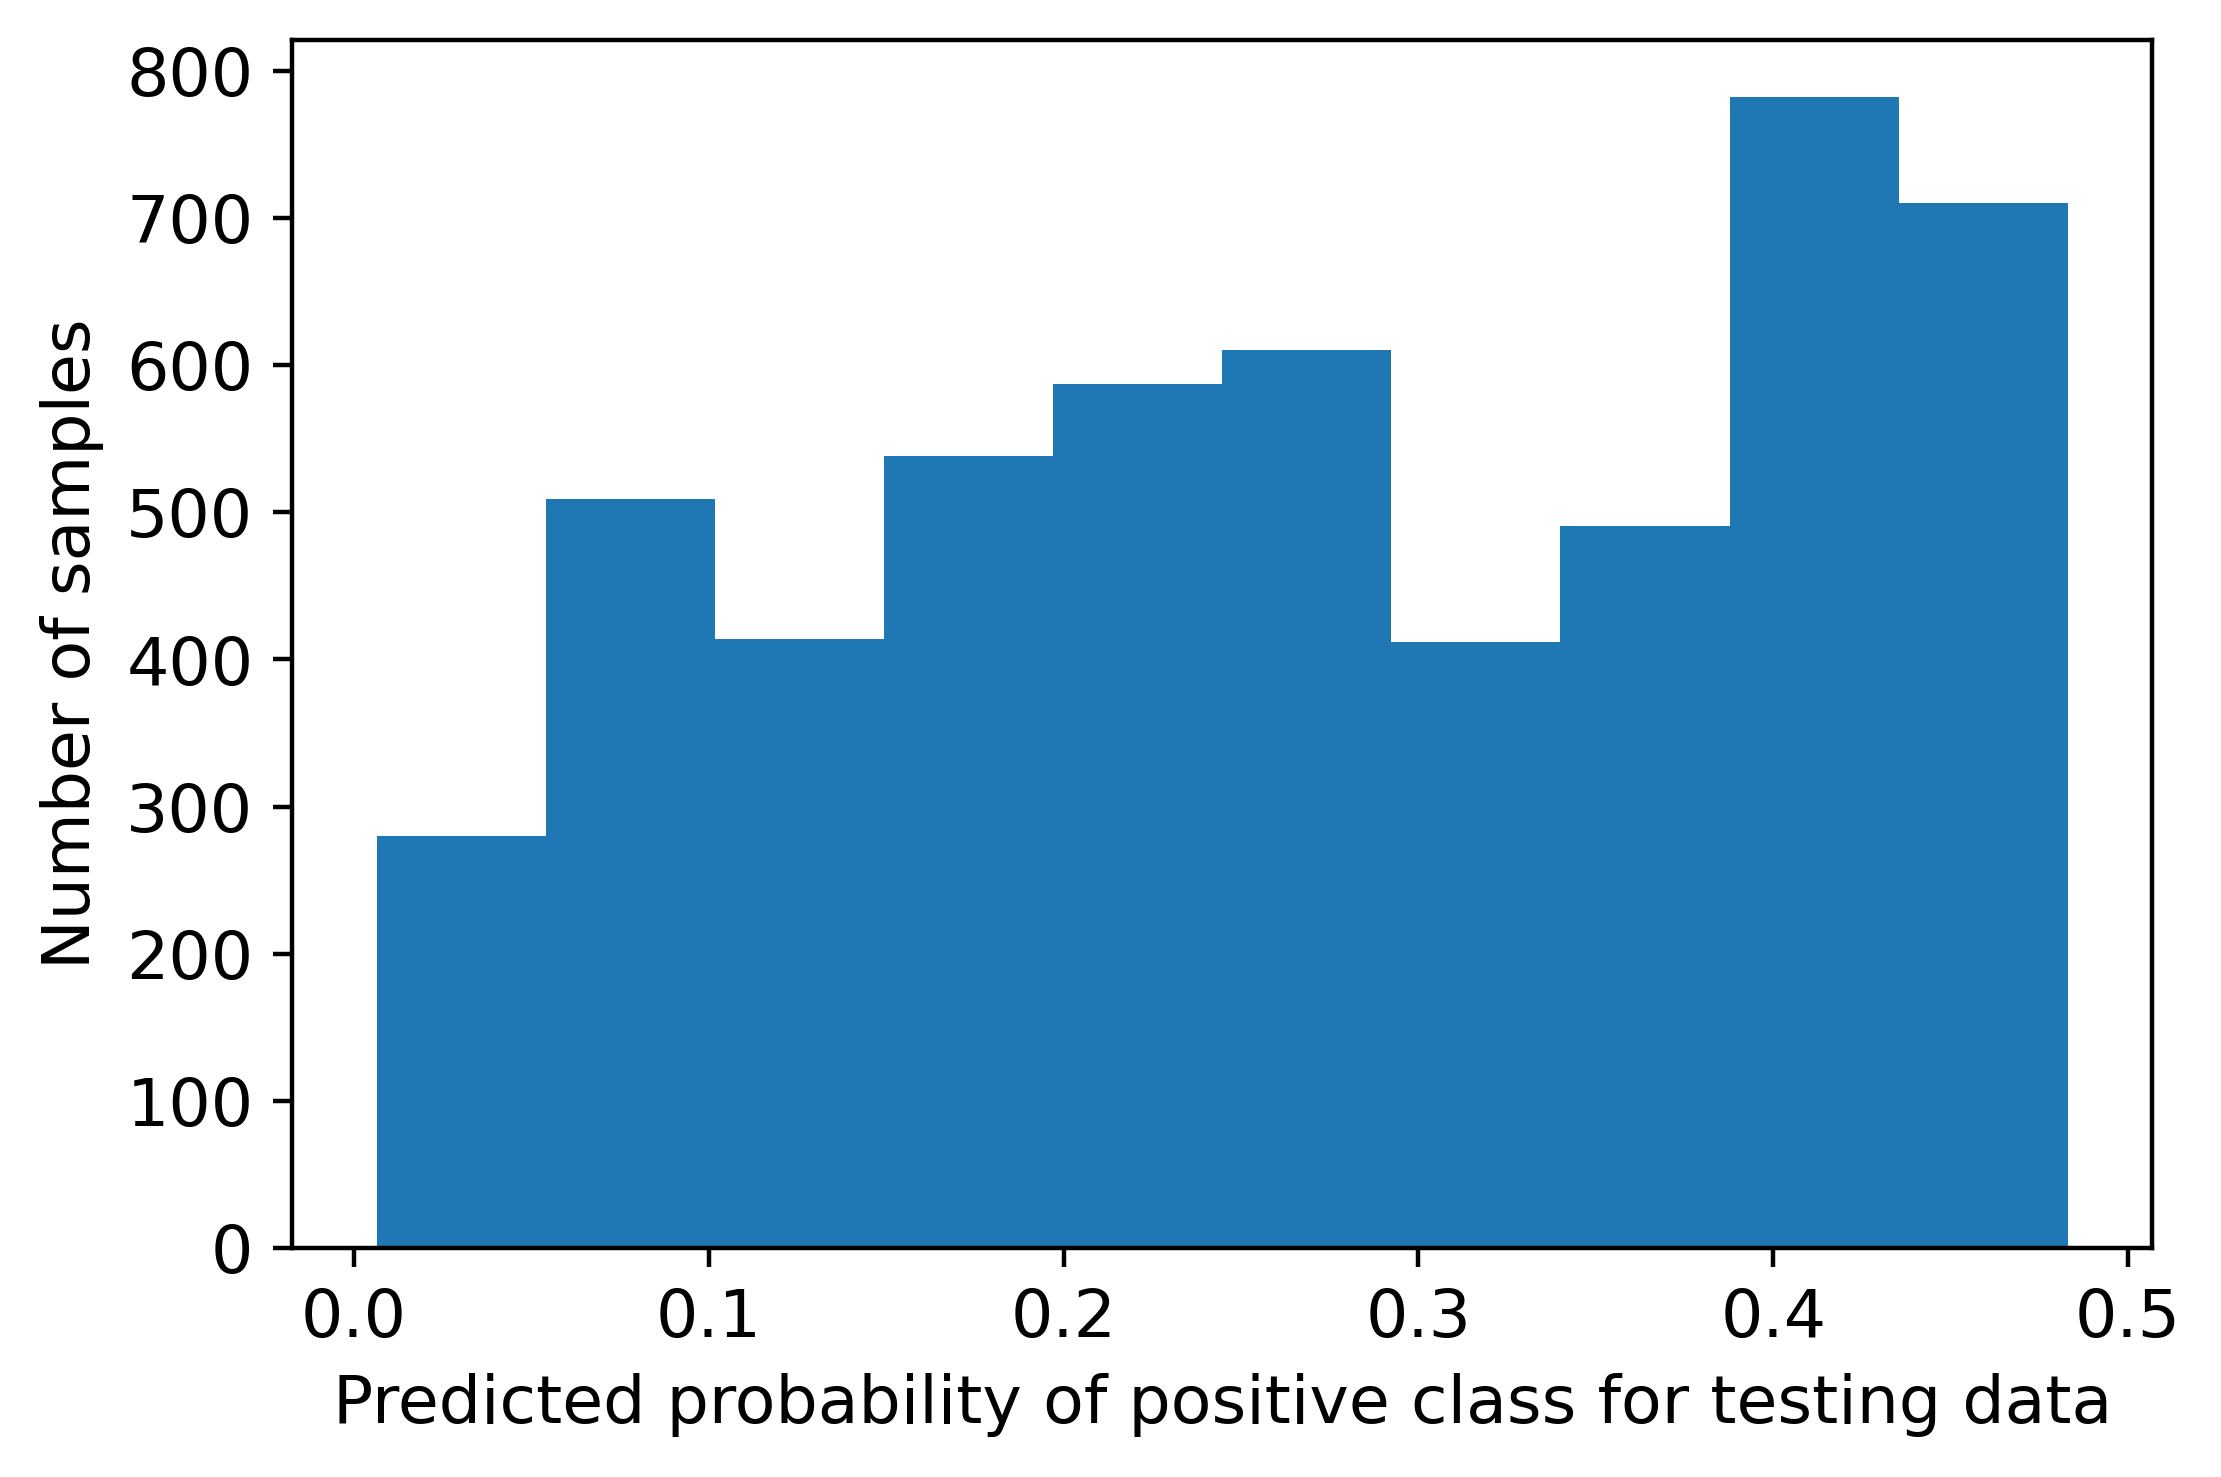

In [47]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')
plt.show()

In [48]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

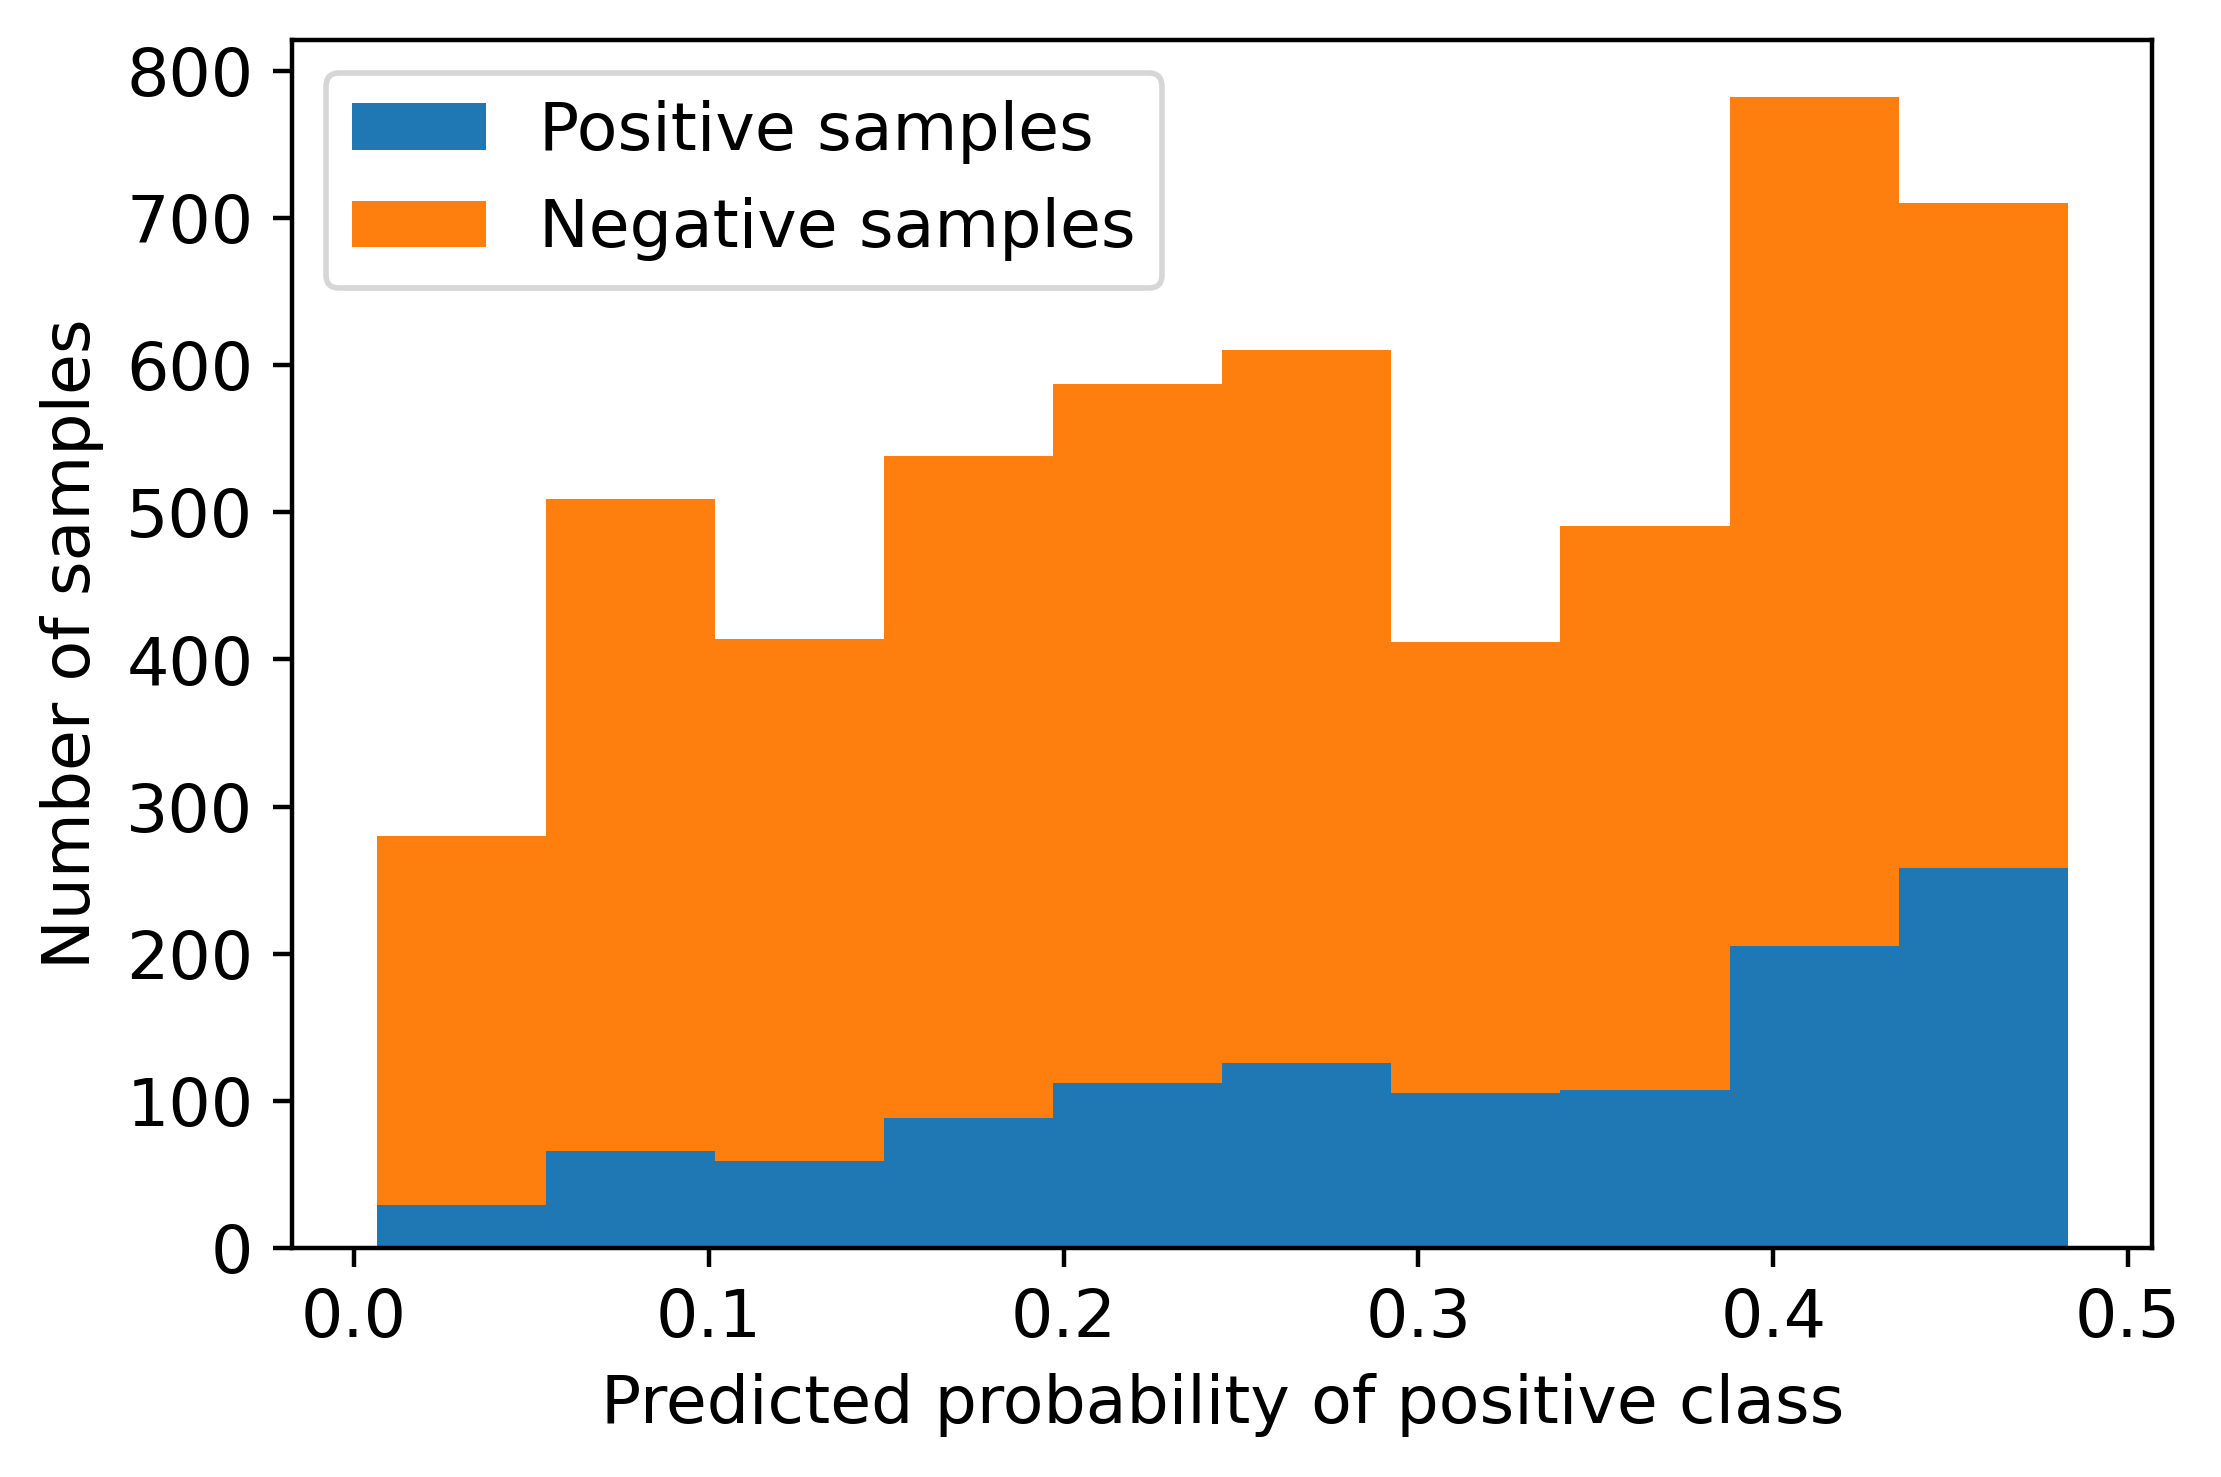

In [49]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')
plt.show()

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [50]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
print(fpr, tpr, thresholds)

[0.         0.01244615 0.06390618 0.10818573 0.11393011 0.2209191
 0.24629009 0.2663954  0.32048827 0.3382001  0.36955481 0.38942078
 0.41168023 0.43752992 0.46146482 0.50335089 0.52752513 0.5454763
 0.57946386 0.58784107 0.64121589 0.66850168 0.68597415 0.71325993
 0.73719483 0.74892293 0.7673528  0.77692676 0.79104835 0.8025371
 0.82431786 0.83389181 0.84657731 0.85495452 0.86213499 0.87170895
 0.90234562 0.90641455 0.91191958 0.92053614 0.9305888  0.93322164
 0.93992341 0.94375299 0.94614648 0.95213021 0.95595979 0.95931067
 0.96242221 0.96553375 0.99258018 0.99305888 0.99377693 0.99377693
 0.99401628 0.99473432 0.99521302 0.99593107 0.99688846 0.99736716
 0.99832456 0.99880326 0.9995213  0.99976065 1.        ] [0.         0.03376623 0.13852814 0.22337662 0.23809524 0.36709957
 0.4008658  0.42597403 0.47619048 0.49350649 0.53766234 0.55411255
 0.58441558 0.60952381 0.63549784 0.67359307 0.69350649 0.7038961
 0.73766234 0.74112554 0.79047619 0.80692641 0.82077922 0.83809524
 0.858008

_________________________________________________________________________
**Now, plot the ROC curve.**


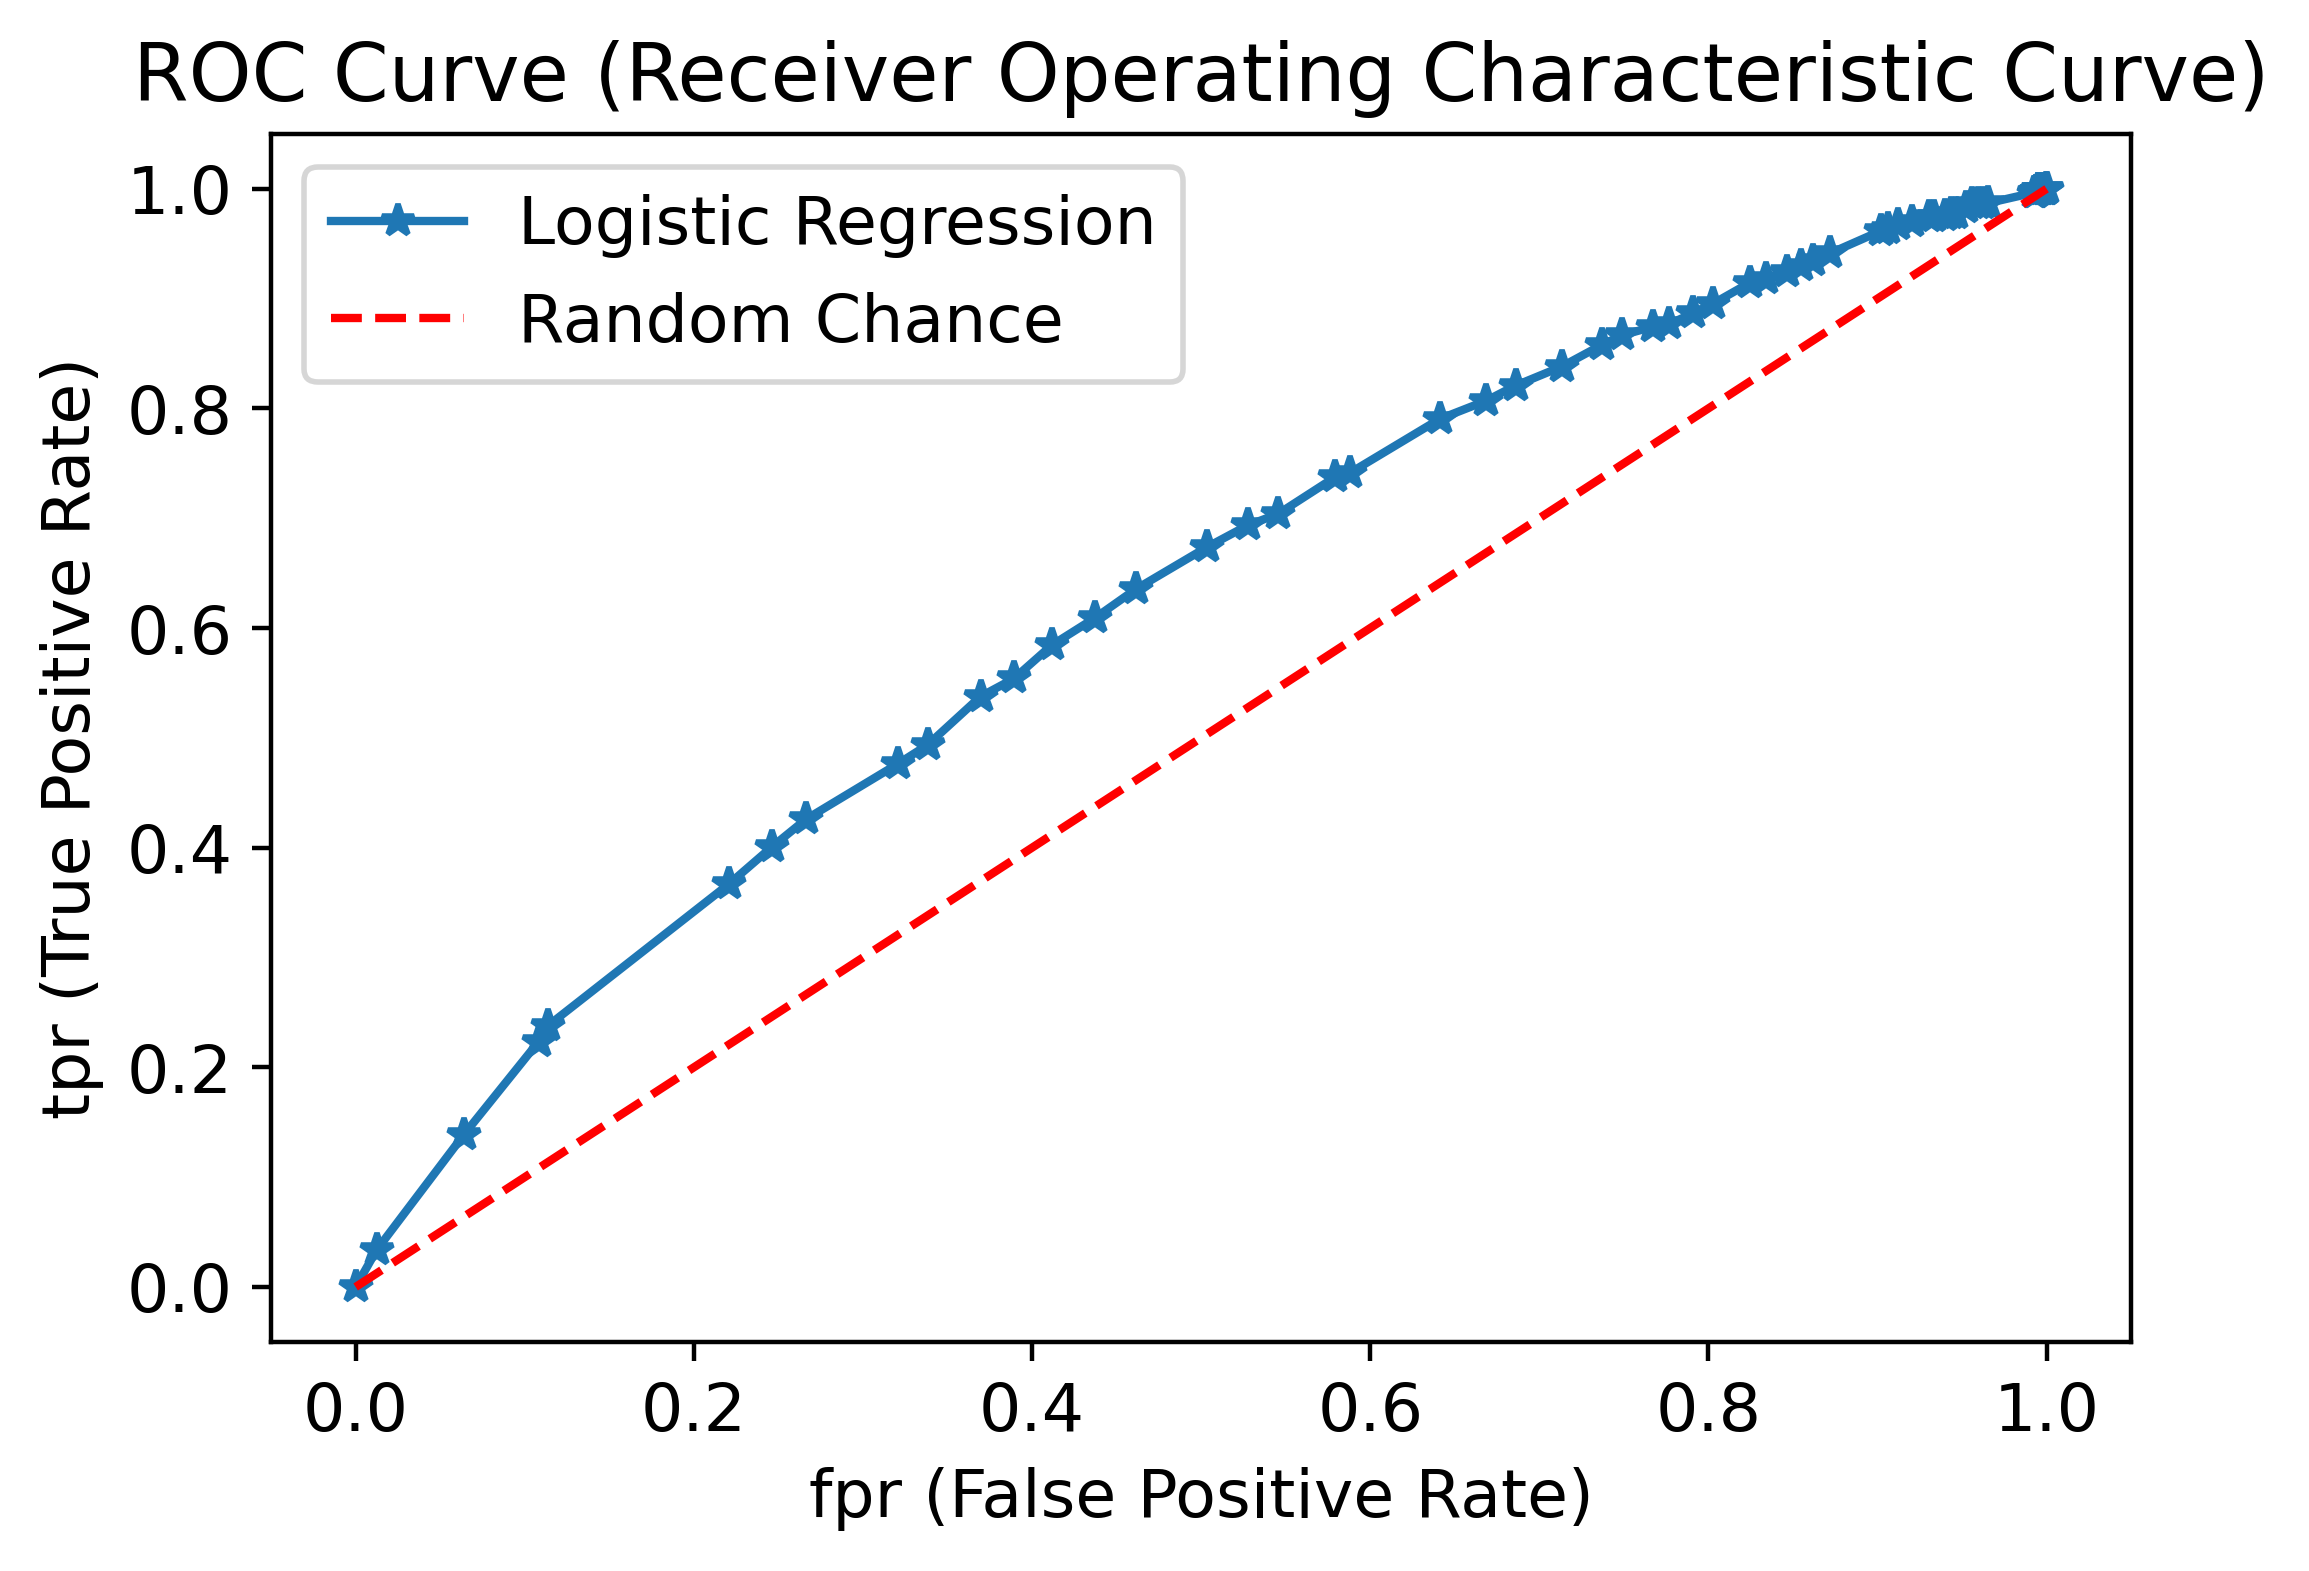

In [51]:
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', "Random Chance"])
plt.xlabel('fpr (False Positive Rate)')
plt.ylabel('tpr (True Positive Rate)')
plt.title('ROC Curve (Receiver Operating Characteristic Curve)')
plt.show()

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [52]:
metrics.roc_auc_score(y_test, pos_proba)

0.6201990844642832

In [53]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)
print(precision, recall, thresholds)

[0.21661665 0.21651032 0.21663225 0.21667293 0.21671362 0.21687653
 0.21695807 0.21712135 0.21724398 0.21728488 0.2173258  0.21715363
 0.21719457 0.21704695 0.21716981 0.21725179 0.22033243 0.22073643
 0.22129396 0.22189753 0.22198318 0.22200354 0.22244133 0.22283792
 0.22392516 0.22441652 0.22553363 0.22670997 0.22714286 0.22761729
 0.22985832 0.2305063  0.23116659 0.231755   0.23327465 0.23466667
 0.23569638 0.23654424 0.23784926 0.23956357 0.24237288 0.24342913
 0.24518744 0.24855794 0.25020134 0.25417595 0.25845411 0.26031164
 0.26293661 0.26655574 0.27004512 0.27573253 0.27804107 0.28183716
 0.28231142 0.28683603 0.28744327 0.29115934 0.30654206 0.31032172
 0.31477357 0.36617843 0.36338028 0.37470726 0.42857143 1.        ] [1.         0.9991342  0.9991342  0.9991342  0.9991342  0.9991342
 0.9991342  0.9991342  0.9991342  0.9991342  0.9991342  0.9974026
 0.9974026  0.9965368  0.9965368  0.9965368  0.98701299 0.98614719
 0.98614719 0.98614719 0.98268398 0.97662338 0.97662338 0.97489

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


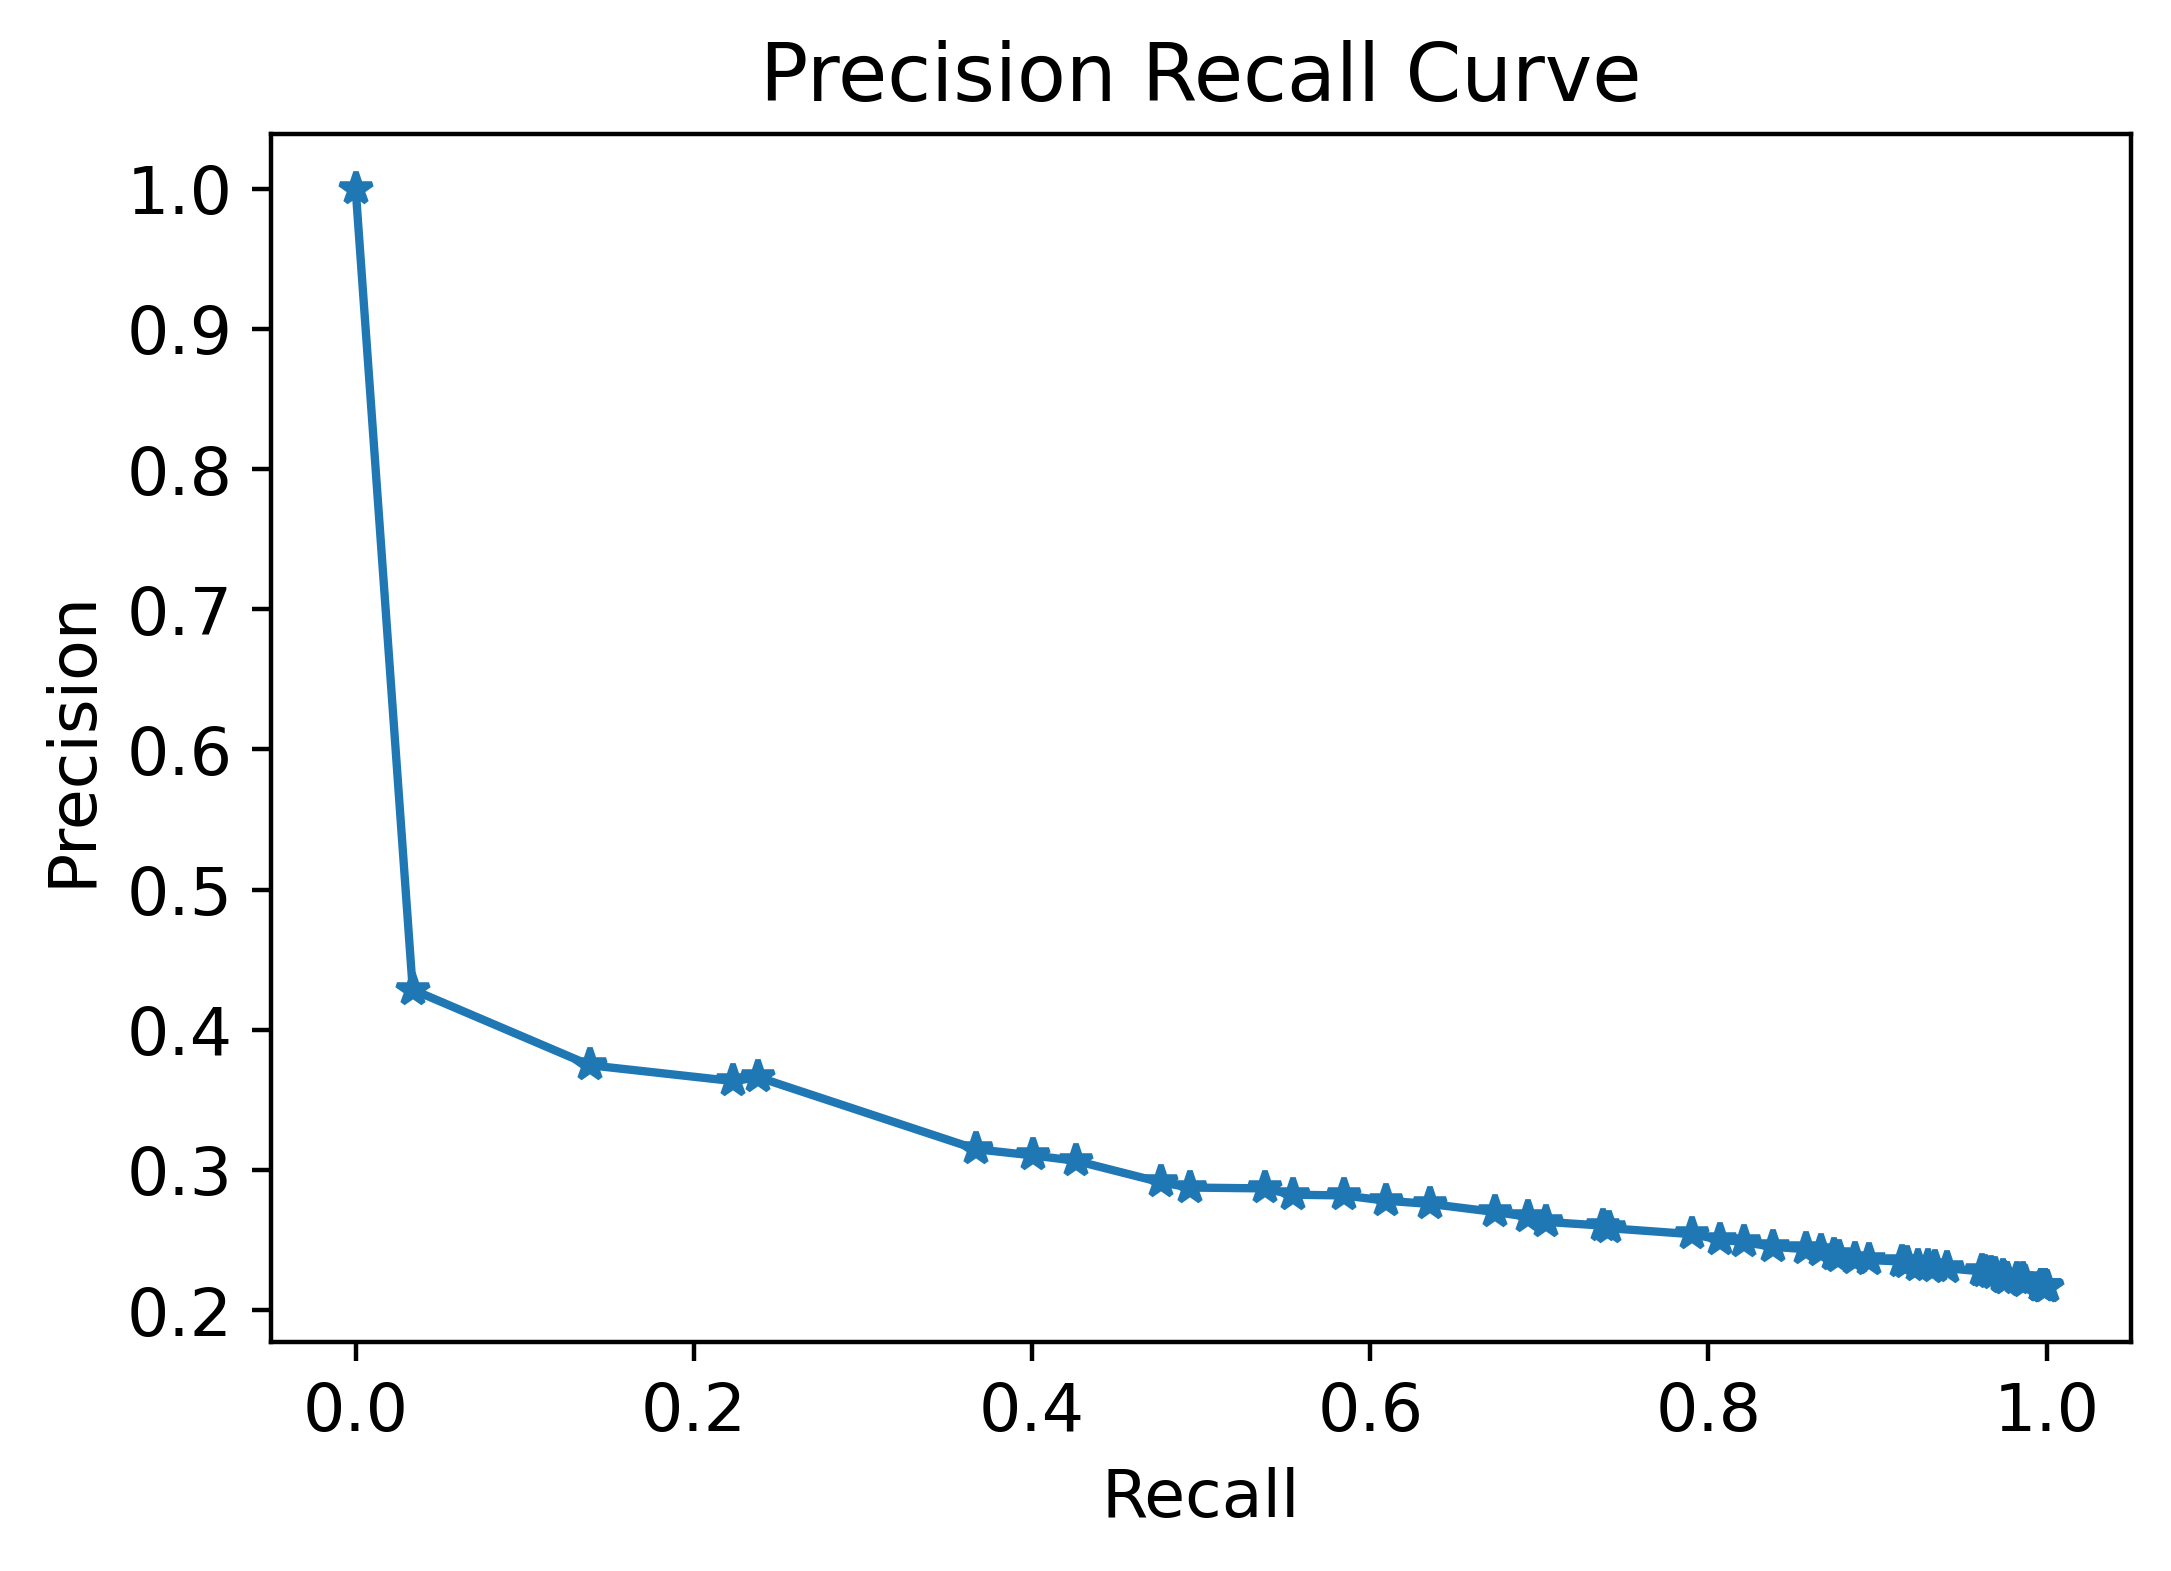

In [54]:
plt.plot(recall, precision, '*-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [55]:
metrics.auc(recall, precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

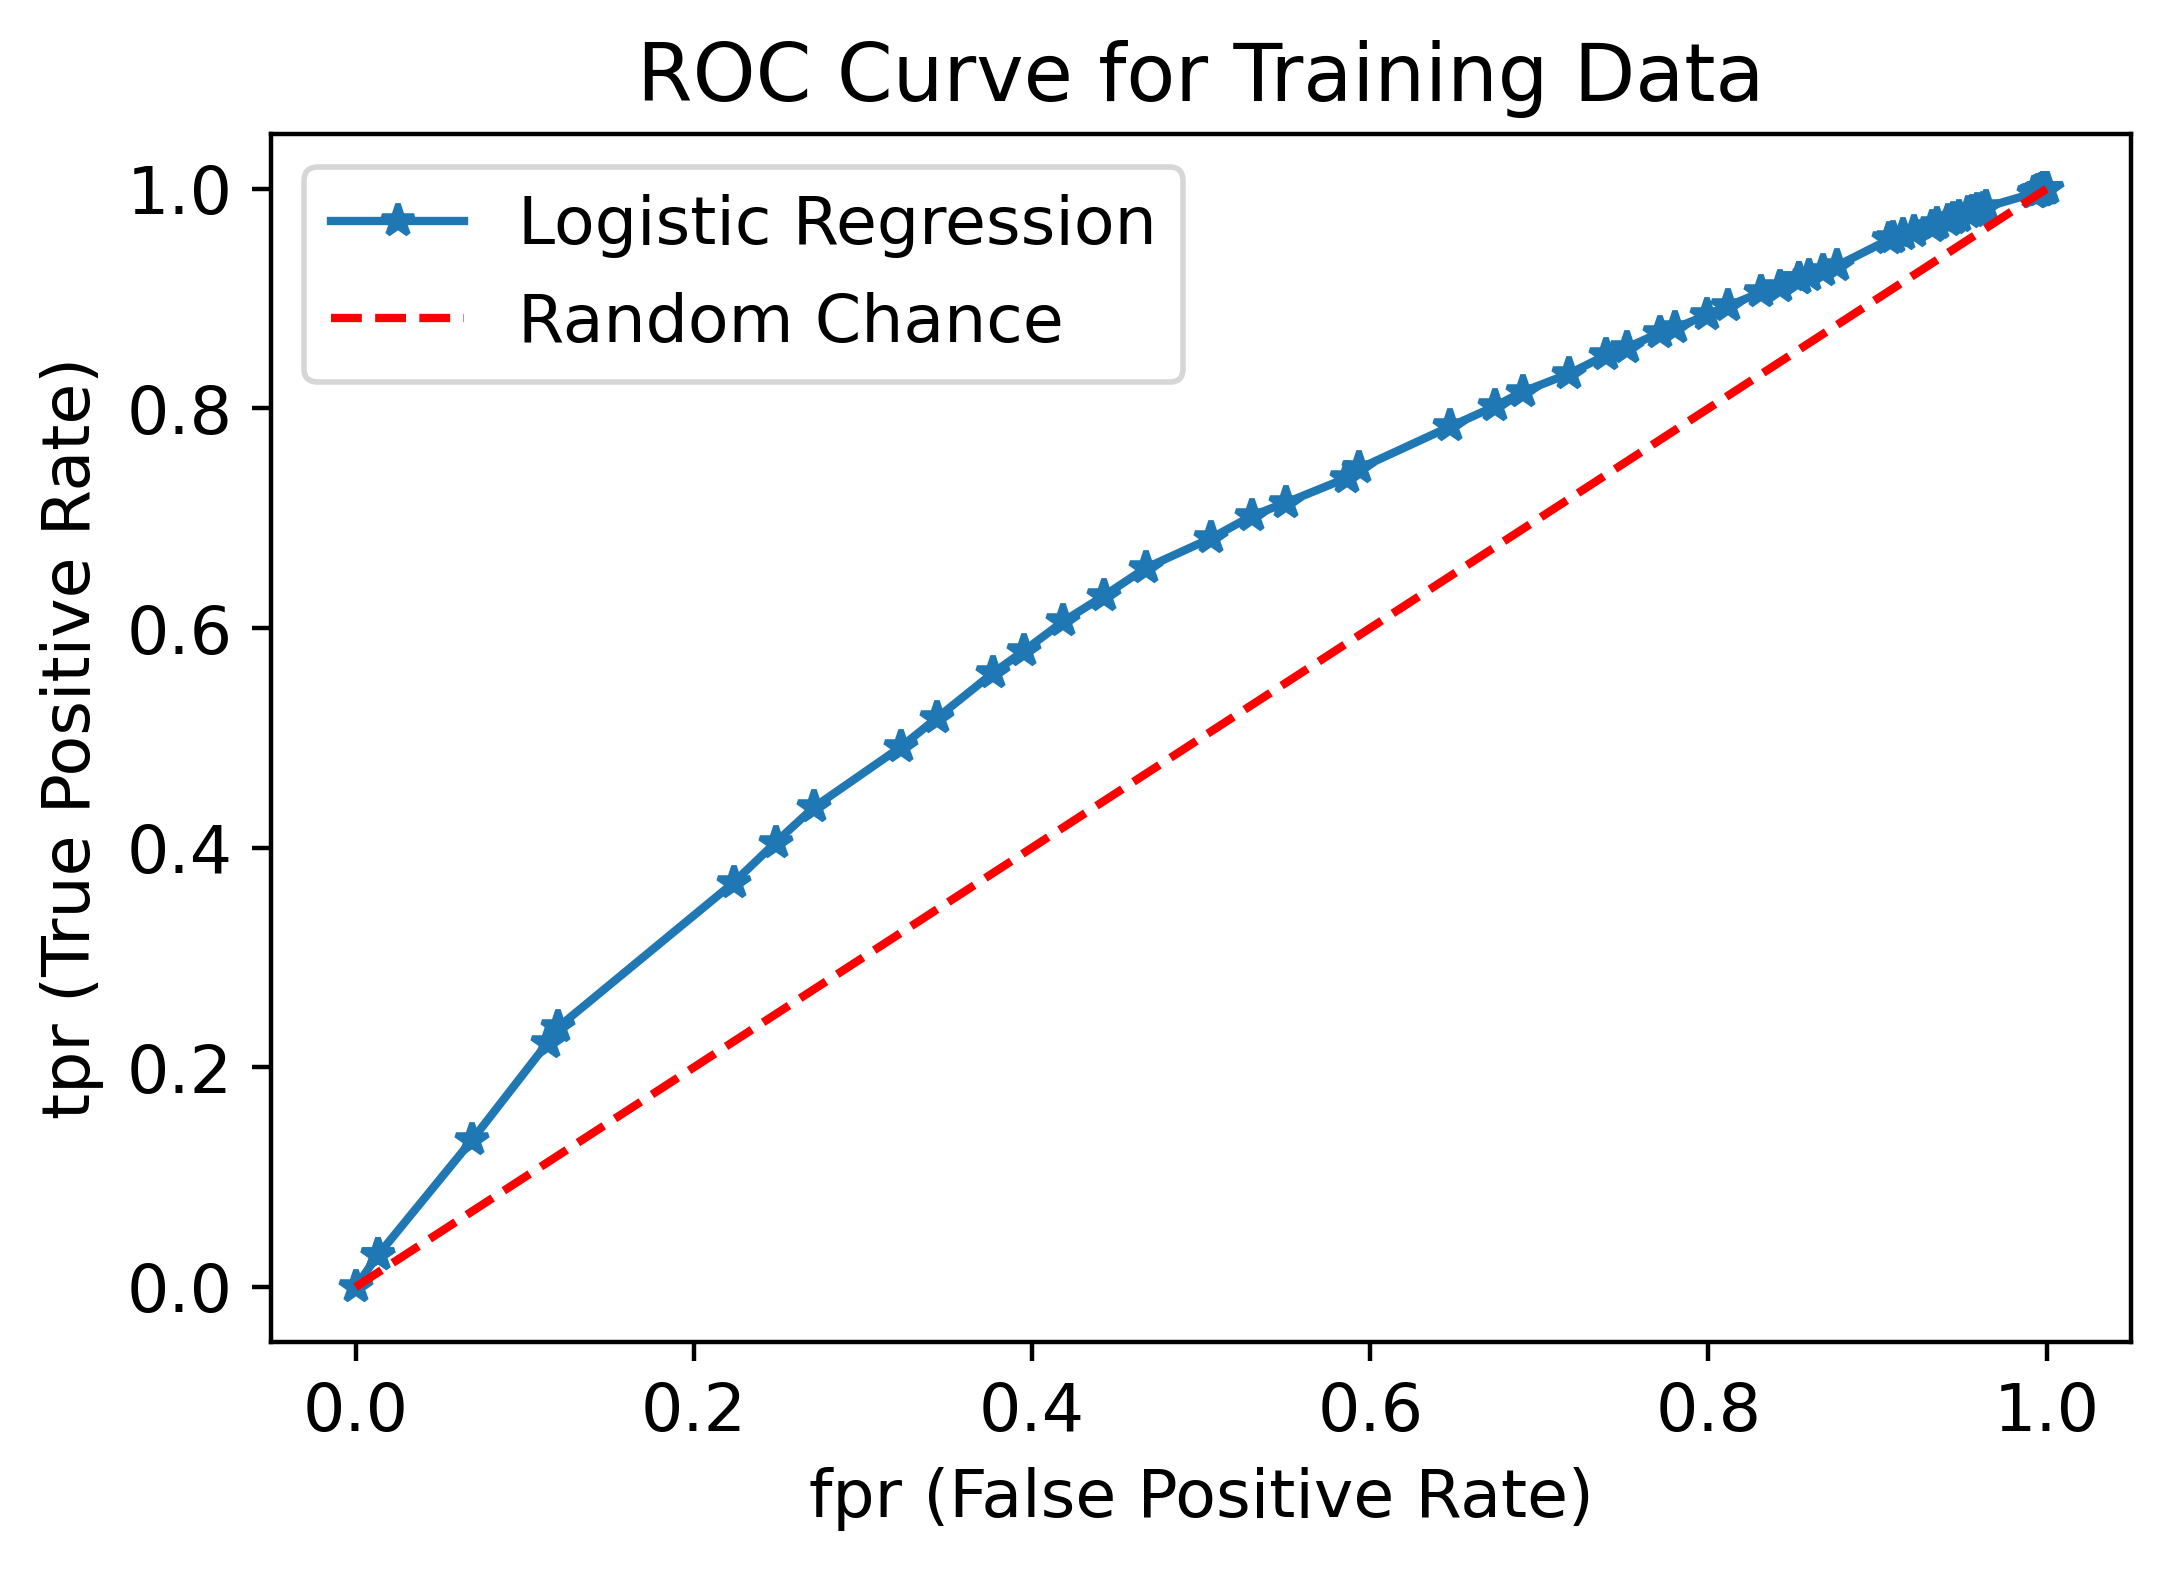

In [56]:
# getting the training samples probability predictions
y_train_prob = example_lr.predict_proba(X_train)

# retriving all positiv class probabilities
train_pos_proba = y_train_prob[:,1]

# getting the required parameters
fpr, tpr, thresholds = metrics.roc_curve(y_train, train_pos_proba)

# plotting roc-auc cuve
plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Logistic Regression', "Random Chance"])
plt.xlabel('fpr (False Positive Rate)')
plt.ylabel('tpr (True Positive Rate)')
plt.title('ROC Curve for Training Data')
plt.show()

    How is this different, conceptually and quantitatively, from your earlier calculation?
